# Introduction

### Dataset Used: **apartment_rent.csv** from Kaggle
### Data source: https://www.kaggle.com/datasets/ariewijaya/rent-pricing-kuala-lumpur-malaysi



The housing market in Kuala Lumpur and Selangor has experienced significant fluctuations due to rapid urbanization and economic changes. Accurately predicting rental prices in these regions is essential for property owners, investors, and potential tenants to make informed decisions. This project aims to leverage machine learning models to predict rental prices for houses in Kuala Lumpur and Selangor. By understanding the various factors that influence rental prices, we can develop a more transparent and efficient real estate market.

To achieve this, we will employ two hybrid learning algorithms: K-means Enhanced Linear Regression Model and Gaussian Mixture Enhanced Linear Regression Model, alongside two supervised learning algorithms: Neural Network model and Support Vector Regressor model. Additionally, we will test three feature selection techniques: Principal Component Analysis (PCA), Recursive Feature Elimination (RFE), and Analysis of Variance (ANOVA). These models and techniques are chosen for their ability to handle complex data and identify significant patterns that influence rental prices.

**Project Problem Statement:**

* The real estate market in Kuala Lumpur and Selangor is highly dynamic, with rental prices influenced by a multitude of factors such as location, property size, and available amenities.
* Traditional methods of predicting rental prices often fail to capture the intricate relationships between these factors, leading to inaccurate pricing and market inefficiencies.
* There is a need for advanced machine learning models and feature selection techniques to improve the accuracy of rental price predictions and provide better insights into the factors driving these prices.

**Project Objectives:**

* Develop Machine Learning Models: Implement and compare two hybrid machine learning algorithms (K-means Enhanced Linear Regression Model and Gaussian Mixture Enhanced Linear Regression Model) and two supervised learning algorithms (Neural Network and Support Vector Regressor) to predict rental prices of houses in Kuala Lumpur and Selangor.

* Feature Selection Techniques: Test and evaluate three feature selection techniques (PCA, RFE, and ANOVA) to identify the most significant features affecting rental prices.


* Provide Insights and Recommendations: Based on the findings, offer insights and recommendations for property owners, investors, and tenants to facilitate better decision-making in the real estate market.

By achieving these objectives, this project aims to enhance the understanding of rental price determinants in Kuala Lumpur and Selangor, ultimately contributing to a more informed and efficient real estate market.





## Load Libraries and the Dataset
-----------------------------------------------------------------------------

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv("apartment_rent.csv")

### Summary Statistics

In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ads_id,19991.0,9.970671e+07,3.482575e+06,16525511.0,99840123.0,100212678.0,100617873.5,100854617.0
completion_year,10806.0,2.014822e+03,6.735355e+00,1977.0,2012.0,2017.0,2020.0,2025.0
parking,14289.0,1.416824e+00,5.673678e-01,1.0,1.0,1.0,2.0,10.0
bathroom,19985.0,1.891719e+00,5.562657e-01,1.0,2.0,2.0,2.0,8.0


## Data Validation
-----------------------------------------------------------------------------

In [42]:
df.head()

,ads_id,prop_name,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region
0,100323185,The Hipster @ Taman Desa,2022.0,RM 4 200 per month,Kuala Lumpur - Taman Desa,Condominium,5,2.0,6.0,1842 sq.ft.,Fully Furnished,"Minimart, Gymnasium, Security, Playground, Swi...","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur
1,100203973,Segar Courts,NaN,RM 2 300 per month,Kuala Lumpur - Cheras,Condominium,3,1.0,2.0,1170 sq.ft.,Partially Furnished,"Playground, Parking, Barbeque area, Security, ...","Air-Cond, Cooking Allowed, Near KTM/LRT",Kuala Lumpur
2,100323128,Pangsapuri Teratak Muhibbah 2,NaN,RM 1 000 per month,Kuala Lumpur - Taman Desa,Apartment,3,NaN,2.0,650 sq.ft.,Fully Furnished,"Minimart, Jogging Track, Lift, Swimming Pool",NaN,Kuala Lumpur
3,100191767,Sentul Point Suite Apartment,2020.0,RM 1 700 per month,Kuala Lumpur - Sentul,Apartment,2,1.0,2.0,743 sq.ft.,Partially Furnished,"Parking, Playground, Swimming Pool, Squash Cou...","Cooking Allowed, Near KTM/LRT, Washing Machine",Kuala Lumpur
4,97022692,Arte Mont Kiara,NaN,RM 1 299 per month,Kuala Lumpur - Mont Kiara,Service Residence,1,1.0,1.0,494 sq.ft.,Not Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...",Air-Cond,Kuala Lumpur


## Data Preprocessing
-----------------------------------------------------------------------------

### Remove Ads ID Column

In [43]:
# Assuming df is your DataFrame containing the "ads_id" column
df.drop(columns=['ads_id'], inplace=True)

### Check for Missing Values

In [44]:
print("Missing values in the dataset:")
print(df.isnull().sum())

Missing values in the dataset:
prop_name                 948
completion_year          9185
monthly_rent                2
location                    0
property_type               0
rooms                       6
parking                  5702
bathroom                    6
size                        0
furnished                   5
facilities               2209
additional_facilities    5948
region                      0
dtype: int64


### Remove Missing Values

In [45]:
# Dropping specified features
features_to_drop = ['prop_name', 'facilities', 'additional_facilities']
df = df.drop(columns=features_to_drop)

In [46]:
# Features with missing values for which you want to drop rows
features_with_missing_values = ['rooms', 'bathroom', 'furnished','monthly_rent']
df = df.dropna(subset=features_with_missing_values)

In [47]:
# Fill missing values in 'completion_year' with mode
completion_year_mode = df['completion_year'].mode()[0]
df['completion_year'].fillna(completion_year_mode, inplace=True)

# Fill missing values in 'parking' with mode
parking_mode = df['parking'].mode()[0]
df['parking'].fillna(parking_mode, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_18512\4174815905.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['completion_year'].fillna(completion_year_mode, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_18512\4174815905.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [48]:
print("Missing values in the dataset:")
print(df.isnull().sum())

Missing values in the dataset:
completion_year    0
monthly_rent       0
location           0
property_type      0
rooms              0
parking            0
bathroom           0
size               0
furnished          0
region             0
dtype: int64


### Check for Duplicated Values

In [49]:
print("Duplicated Rows in the dataset:")
print(df.duplicated().sum())

Duplicated Rows in the dataset:
4973


### Remove Duplicated Rows

In [50]:
# Remove duplicated rows
df.drop_duplicates(inplace=True)
print("Number of duplicated rows after removal:", df.duplicated().sum())

Number of duplicated rows after removal: 0


### Check Data Types

In [51]:
print("\nData types in the dataset:")
print(df.dtypes)


Data types in the dataset:
completion_year    float64
monthly_rent        object
location            object
property_type       object
rooms               object
parking            float64
bathroom           float64
size                object
furnished           object
region              object
dtype: object


### Data Type Conversion

In [52]:
# Remove non-numeric characters and convert to float
df['monthly_rent'] = df['monthly_rent'].str.replace(r'\D', '', regex=True).astype(float)
df['size'] = df['size'].str.replace(r'\D', '', regex=True).astype(float)

# Replace 'More than 10' with a suitable numerical value
df['rooms'] = df['rooms'].replace('More than 10', 10)

# Convert from object to int/float
df['rooms'] = df['rooms'].astype(int)
df['bathroom'] = df['bathroom'].astype(int)
df['parking'] = df['parking'].astype(int)
df['completion_year'] = df['completion_year'].astype(int)

In [53]:
print(df.dtypes)

completion_year      int32
monthly_rent       float64
location            object
property_type       object
rooms                int32
parking              int32
bathroom             int32
size               float64
furnished           object
region              object
dtype: object


In [54]:
df.head()

,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,region
0,2022,4200.0,Kuala Lumpur - Taman Desa,Condominium,5,2,6,1842.0,Fully Furnished,Kuala Lumpur
1,2021,2300.0,Kuala Lumpur - Cheras,Condominium,3,1,2,1170.0,Partially Furnished,Kuala Lumpur
2,2021,1000.0,Kuala Lumpur - Taman Desa,Apartment,3,1,2,650.0,Fully Furnished,Kuala Lumpur
3,2020,1700.0,Kuala Lumpur - Sentul,Apartment,2,1,2,743.0,Partially Furnished,Kuala Lumpur
4,2021,1299.0,Kuala Lumpur - Mont Kiara,Service Residence,1,1,1,494.0,Not Furnished,Kuala Lumpur


## Feature Engineering

-------------------------------------------------------------

### Split Location into City and Area

In [55]:
# Split 'location' into 'city' and 'area'
df['City'] = df['location'].apply(lambda x: x.split(' - ')[0])
df['Area'] = df['location'].apply(lambda x: x.split(' - ')[1])

# Drop the original 'location' column
df.drop(columns=['location'], inplace=True)

# Verify the changes
print(df[['City', 'Area']].head())

           City        Area
0  Kuala Lumpur  Taman Desa
1  Kuala Lumpur      Cheras
2  Kuala Lumpur  Taman Desa
3  Kuala Lumpur      Sentul
4  Kuala Lumpur  Mont Kiara


### Split Property Type into Individual Types

In [56]:
# Perform one-hot encoding for 'property_type'
df = pd.get_dummies(df, columns=['property_type'], prefix='Property')

### Combine Rooms and Bathrooms

In [57]:
# Create new feature 'Total Rooms and Bathrooms'
df['Total Rooms/Bathrooms'] = df['rooms'] + df['bathroom']

# Verify the changes
print(df[['rooms', 'bathroom', 'Total Rooms/Bathrooms']].head())

   rooms  bathroom  Total Rooms/Bathrooms
0      5         6                     11
1      3         2                      5
2      3         2                      5
3      2         2                      4
4      1         1                      2


### Check New Features

In [58]:
# Verify the changes
df.head()

,completion_year,monthly_rent,rooms,parking,bathroom,size,furnished,region,City,Area,Property_Apartment,Property_Condominium,Property_Duplex,Property_Flat,Property_Others,Property_Service Residence,Property_Studio,Property_Townhouse Condo,Total Rooms/Bathrooms
0,2022,4200.0,5,2,6,1842.0,Fully Furnished,Kuala Lumpur,Kuala Lumpur,Taman Desa,False,True,False,False,False,False,False,False,11
1,2021,2300.0,3,1,2,1170.0,Partially Furnished,Kuala Lumpur,Kuala Lumpur,Cheras,False,True,False,False,False,False,False,False,5
2,2021,1000.0,3,1,2,650.0,Fully Furnished,Kuala Lumpur,Kuala Lumpur,Taman Desa,True,False,False,False,False,False,False,False,5
3,2020,1700.0,2,1,2,743.0,Partially Furnished,Kuala Lumpur,Kuala Lumpur,Sentul,True,False,False,False,False,False,False,False,4
4,2021,1299.0,1,1,1,494.0,Not Furnished,Kuala Lumpur,Kuala Lumpur,Mont Kiara,False,False,False,False,False,True,False,False,2


In [59]:
df.to_csv('data_cleaned.csv', index=False)

## Exploratory Data Analysis

-------------------------------------------------------------

### Summary Statistics

In [60]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
completion_year,15010.0,2017.558961,5.914679,1977.0,2016.0,2021.0,2021.0,2025.0
monthly_rent,15010.0,2430.580346,25465.569039,70.0,1100.0,1400.0,1899.0,2400000.0
rooms,15010.0,2.680613,0.824409,1.0,2.0,3.0,3.0,10.0
parking,15010.0,1.304064,0.530014,1.0,1.0,1.0,2.0,10.0
bathroom,15010.0,1.894670,0.575239,1.0,2.0,2.0,2.0,8.0
size,15010.0,7591.598734,816217.132290,1.0,750.0,900.0,1050.0,99999999.0
Total Rooms/Bathrooms,15010.0,4.575283,1.281942,2.0,4.0,5.0,5.0,14.0


Property Characteristics:

Completion Year: Most properties are relatively new, with the majority completed around the same time.

Rooms and Bathrooms: Properties tend to have fewer rooms and bathrooms, indicating smaller units.

Size: The normalized property sizes are very small on average, suggesting compact living spaces.

Parking: Limited availability of parking is a common feature, with most properties offering no parking at all.

Rent and Variability:

Monthly Rent: There is a high variability in rent, but the average normalized rent is very low, indicating a wide range of rental prices.

High Variability: Attributes such as monthly rent, size, and the combined total of rooms and bathrooms show significant variability, reflecting a diverse range of property types and costs.

Distribution Patterns:

Concentration: Most attributes are concentrated in the lower ranges (e.g., rooms, parking, size), with the majority of properties having minimal features and amenities.

In [61]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
completion_year,15010.0,NaN,NaN,NaN,2017.558961,5.914679,1977.0,2016.0,2021.0,2021.0,2025.0
monthly_rent,15010.0,NaN,NaN,NaN,2430.580346,25465.569039,70.0,1100.0,1400.0,1899.0,2400000.0
rooms,15010.0,NaN,NaN,NaN,2.680613,0.824409,1.0,2.0,3.0,3.0,10.0
parking,15010.0,NaN,NaN,NaN,1.304064,0.530014,1.0,1.0,1.0,2.0,10.0
bathroom,15010.0,NaN,NaN,NaN,1.89467,0.575239,1.0,2.0,2.0,2.0,8.0
size,15010.0,NaN,NaN,NaN,7591.598734,816217.13229,1.0,750.0,900.0,1050.0,99999999.0
furnished,15010,3,Fully Furnished,6322,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,15010,2,Selangor,7737,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,15010,2,Selangor,7737,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Area,15010,126,Cheras,1538,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Categorical Data:

Furnishing: The majority of properties are fully furnished (8456 out of 19975).

Location: Most properties are located in Kuala Lumpur, with Cheras being the most common area (2156 listings).

Property Types: The dataset is dominated by condominiums and apartments, with a significant number of listings marked as 'False' for property types like duplex, flat, others, service residence, studio, and townhouse condo.

### EDA Univariate Analysis

In [62]:
#Before we do EDA, lets separate Numerical and categorical variables for easy analysis

cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['furnished', 'region', 'City', 'Area'], dtype='object')
Numerical Variables:
['completion_year', 'monthly_rent', 'rooms', 'parking', 'bathroom', 'size', 'Total Rooms/Bathrooms']


### EDA Multivariate Analysis

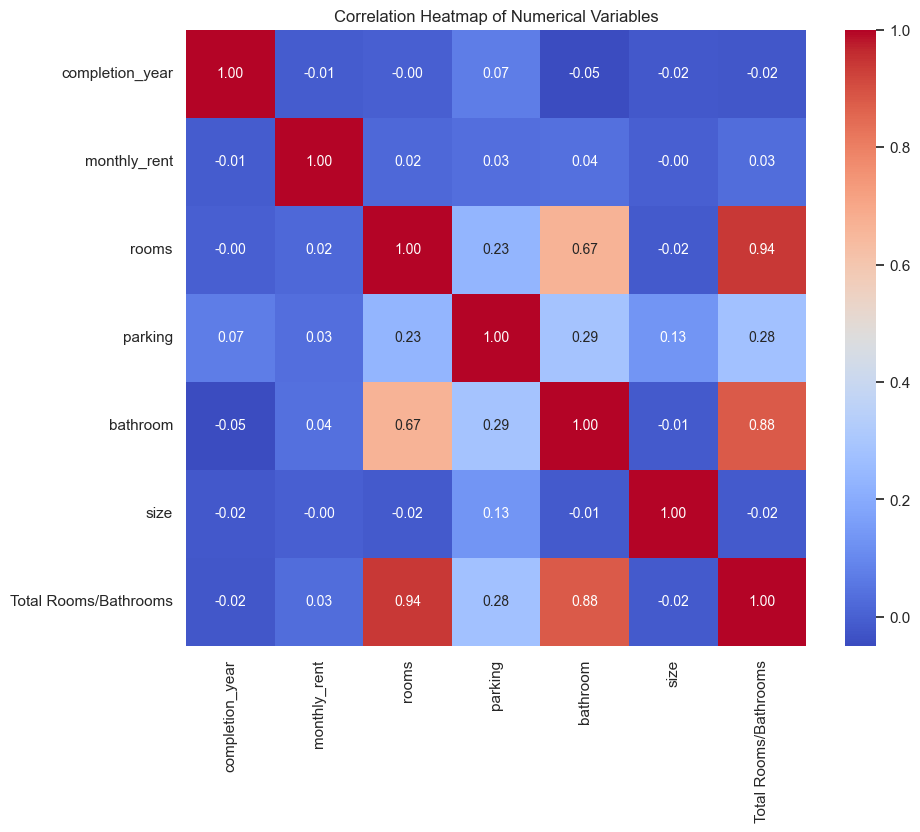

In [63]:
# Calculate the correlation matrix
correlation_matrix = df[num_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


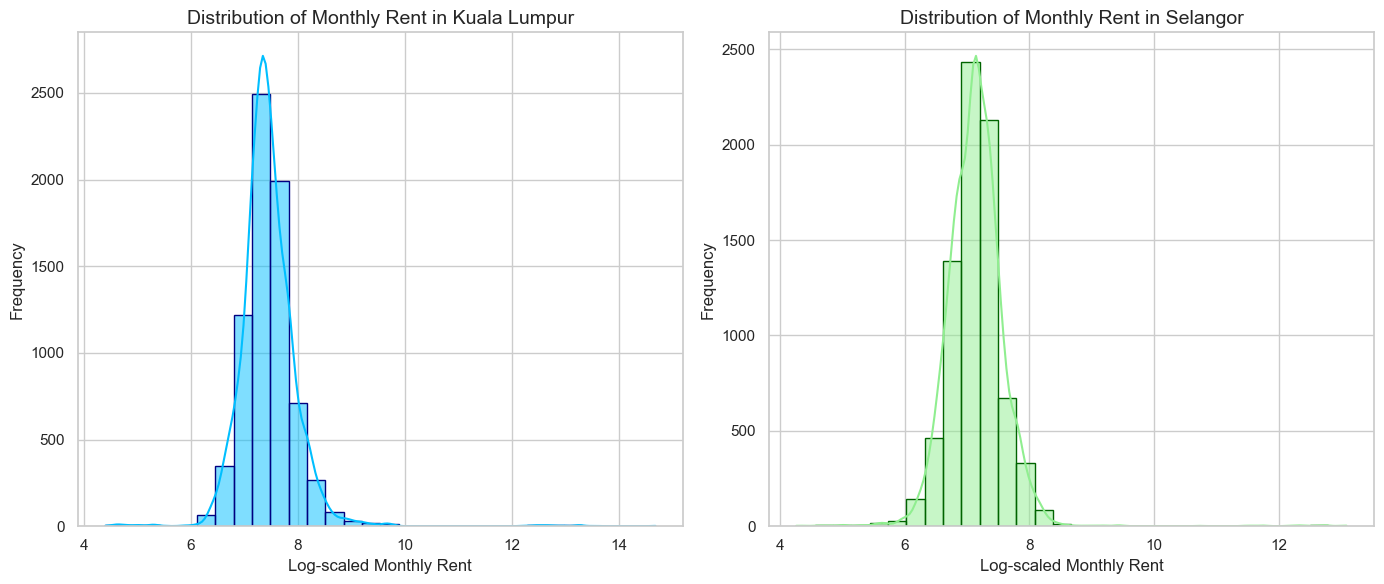

In [64]:
plt.figure(figsize=(14, 6))

# Applying a cleaner theme
sns.set(style="whitegrid")

# Filter the data for Kuala Lumpur
kl_data = df[df['region'] == 'Kuala Lumpur']
# Filter the data for Selangor
selangor_data = df[df['region'] == 'Selangor']

# Subplot 1: Histogram for Kuala Lumpur
plt.subplot(1, 2, 1)
sns.histplot(np.log1p(kl_data['monthly_rent']), bins=30, kde=True, color='deepskyblue', edgecolor='navy')
plt.title('Distribution of Monthly Rent in Kuala Lumpur', fontsize=14)
plt.xlabel('Log-scaled Monthly Rent', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Subplot 2: Histogram for Selangor
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(selangor_data['monthly_rent']), bins=30, kde=True, color='lightgreen', edgecolor='darkgreen')
plt.title('Distribution of Monthly Rent in Selangor', fontsize=14)
plt.xlabel('Log-scaled Monthly Rent', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Improving layout and aesthetics
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


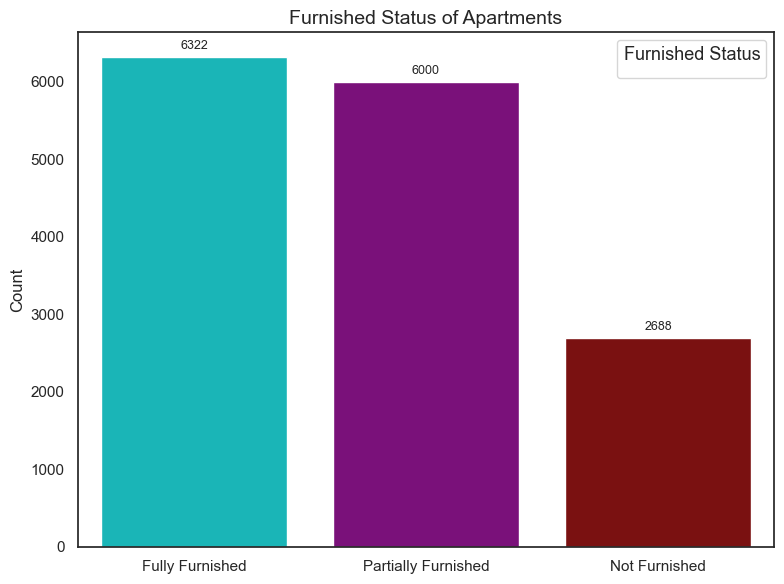

In [65]:
plt.figure(figsize=(8, 6))

# Set the background style to white without grids
sns.set(style="white", rc={"axes.grid" : False})

# Bar Chart for Furnished Status
# Corrected color name and adjusted usage according to deprecation warning
furnished_count = sns.countplot(x='furnished', hue='furnished', data=df, 
                                palette=['darkturquoise', 'darkmagenta', 'darkred'], 
                                dodge=False)  # Set dodge to False to mimic original countplot appearance
plt.title('Furnished Status of Apartments', fontsize=14)
plt.xlabel('')
plt.ylabel('Count', fontsize=12)
plt.legend(title='Furnished Status', title_fontsize='13', fontsize='11', loc='upper right')

# Add labels to the bars
for bar in furnished_count.patches:
    plt.annotate(format(bar.get_height(), '.0f'),
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='center',
                 size=9, xytext=(0, 8),
                 textcoords='offset points')

plt.tight_layout()
plt.show()

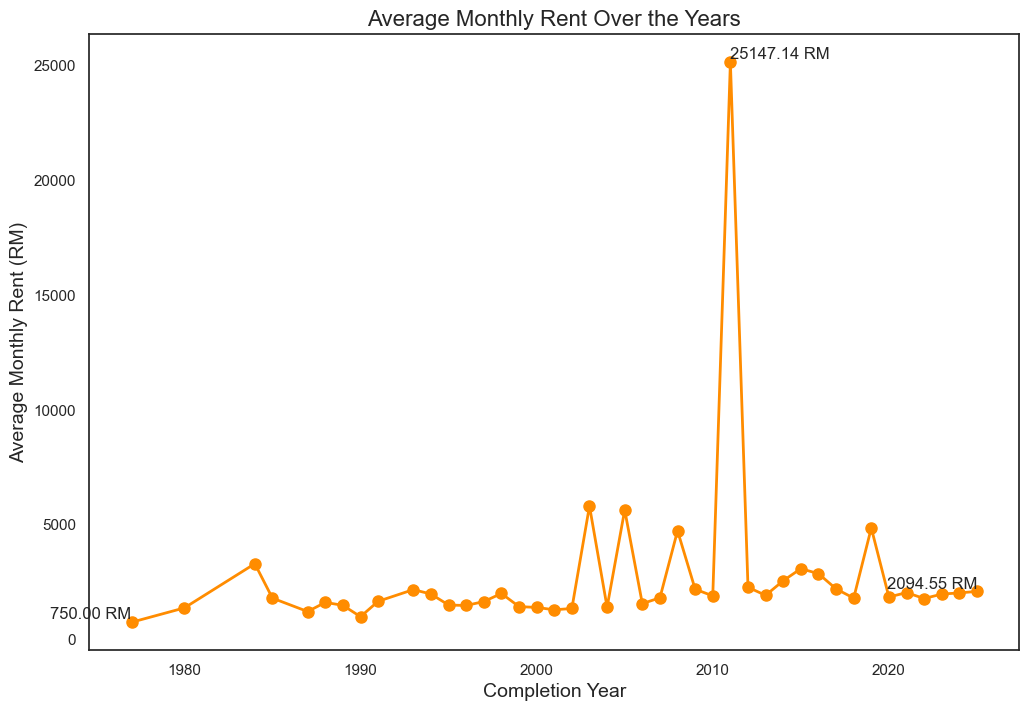

In [66]:
# Calculate average monthly rent by year
average_rent = df.groupby('completion_year')['monthly_rent'].mean()

plt.figure(figsize=(12, 8))
average_rent.plot(kind='line', marker='o', linewidth=2, linestyle='-', color='darkorange', markersize=8)  

# Labeling the first, highest, and last points with improved formatting
# First point
first_year = average_rent.index[0]
first_value = average_rent.iloc[0]
plt.text(first_year, first_value, f'{first_value:.2f} RM', va='bottom', ha='right')

# Highest point
highest_year = average_rent.idxmax()
highest_value = average_rent.max()
plt.text(highest_year, highest_value, f'{highest_value:.2f} RM', va='bottom')

# Last point
last_year = average_rent.index[-1]
last_value = average_rent.iloc[-1]
plt.text(last_year, last_value, f'{last_value:.2f} RM', va='bottom', ha='right')

plt.title('Average Monthly Rent Over the Years', fontsize=16)
plt.xlabel('Completion Year', fontsize=14)
plt.ylabel('Average Monthly Rent (RM)', fontsize=14)
plt.show()


## Data Normalization

-------------------------------------------------------------

### MinMax Scaling

In [67]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical features for normalization
numerical_features = ['completion_year', 'monthly_rent', 'rooms', 'parking', 'bathroom', 'size', 'Total Rooms/Bathrooms']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [68]:
# Verify the changes
df.head()

,completion_year,monthly_rent,rooms,parking,bathroom,size,furnished,region,City,Area,Property_Apartment,Property_Condominium,Property_Duplex,Property_Flat,Property_Others,Property_Service Residence,Property_Studio,Property_Townhouse Condo,Total Rooms/Bathrooms
0,0.937500,0.001721,0.444444,0.111111,0.714286,0.000018,Fully Furnished,Kuala Lumpur,Kuala Lumpur,Taman Desa,False,True,False,False,False,False,False,False,0.750000
1,0.916667,0.000929,0.222222,0.000000,0.142857,0.000012,Partially Furnished,Kuala Lumpur,Kuala Lumpur,Cheras,False,True,False,False,False,False,False,False,0.250000
2,0.916667,0.000388,0.222222,0.000000,0.142857,0.000006,Fully Furnished,Kuala Lumpur,Kuala Lumpur,Taman Desa,True,False,False,False,False,False,False,False,0.250000
3,0.895833,0.000679,0.111111,0.000000,0.142857,0.000007,Partially Furnished,Kuala Lumpur,Kuala Lumpur,Sentul,True,False,False,False,False,False,False,False,0.166667
4,0.916667,0.000512,0.000000,0.000000,0.000000,0.000005,Not Furnished,Kuala Lumpur,Kuala Lumpur,Mont Kiara,False,False,False,False,False,True,False,False,0.000000


## Feature Selection Algorithm

-------------------------------------------------------------

### Principal Component Analysis Algorithm (Unsupervised)

In [69]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Separate features and target variable
X = df.drop(columns=['monthly_rent'])
y = df['monthly_rent']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Create a column transformer with one-hot encoding for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(sparse_output=False), categorical_cols)  # Set sparse_output to False
    ])

# Initialize a dictionary to store the DataFrames
df_pca_dict = {}

# Loop through possible numbers of PCA components
for n_components in range(5, 11):
    # Create a pipeline that first preprocesses the data then applies PCA
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('pca', PCA(n_components=n_components))
    ])

    # Fit the pipeline to the data
    pipeline.fit(X, y)

    # Get the transformed features
    X_pca = pipeline.named_steps['pca'].transform(pipeline.named_steps['preprocessor'].transform(X))

    # Convert PCA results to DataFrame
    df_pca = pd.DataFrame(data=X_pca, columns=[f'PC{i}' for i in range(1, X_pca.shape[1] + 1)])

    # Add the target variable back to the DataFrame
    df_pca['monthly_rent'] = y.values

    # Store the DataFrame in the dictionary
    df_pca_dict[f'df_pca_{n_components}_components'] = df_pca

    print(f"DataFrame with {n_components} PCA components:")
    print(df_pca.head())
    print()

# Now df_pca_dict contains DataFrames with PCA components from 5 to 10


DataFrame with 5 PCA components:
        PC1       PC2       PC3       PC4       PC5  monthly_rent
0 -1.182822  0.580297  0.524864 -0.281460 -0.184303      0.001721
1 -1.099014 -0.704358  0.677605  0.229657  0.113177      0.000929
2 -0.972119  0.227312 -0.644788 -0.562254 -0.814138      0.000388
3 -0.885247 -1.055665 -0.478392 -0.054168 -0.571769      0.000679
4 -0.928700 -0.004339 -0.899686 -0.027461  1.058636      0.000512

DataFrame with 6 PCA components:
        PC1       PC2       PC3       PC4       PC5       PC6  monthly_rent
0 -1.182822  0.580297  0.524864 -0.281460 -0.184303 -0.123047      0.001721
1 -1.099014 -0.704358  0.677605  0.229657  0.113177  0.833386      0.000929
2 -0.972119  0.227312 -0.644788 -0.562254 -0.814138 -0.080828      0.000388
3 -0.885247 -1.055665 -0.478392 -0.054168 -0.571769 -0.179752      0.000679
4 -0.928700 -0.004339 -0.899686 -0.027461  1.058636 -0.192059      0.000512

DataFrame with 7 PCA components:
        PC1       PC2       PC3       PC4      

### Recursive Feature Elimination (Supervised)

In [70]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Separate features and target variable
X = df.drop(columns=['monthly_rent'])
y = df['monthly_rent']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Create a column transformer with one-hot encoding for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Standardize numerical columns
        ('cat', OneHotEncoder(drop='first'), categorical_cols)  # One-hot encode categorical columns
    ],
    sparse_threshold=0  # Convert sparse to dense below this threshold
)

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(X)

# Initialize a dictionary to store the DataFrames
df_rfe_dict = {}

# Loop through the range of features to select (from 5 to 10)
for n_features_to_select in range(5, 11):
    # Create the RFE object with a Linear Regression estimator
    estimator = LinearRegression()
    selector = RFE(estimator, n_features_to_select=n_features_to_select)
    
    # Fit RFE
    selector = selector.fit(X_preprocessed, y)
    
    # Transform the data
    X_rfe = selector.transform(X_preprocessed)
    
    # Get the selected feature names
    selected_feature_names = [
        feature for feature, selected in zip(
            numerical_cols.tolist() + preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols).tolist(),
            selector.support_
        ) if selected
    ]
    
    # Convert RFE results to DataFrame
    df_rfe = pd.DataFrame(data=X_rfe, columns=selected_feature_names)
    
    # Add the target variable back to the DataFrame
    df_rfe['monthly_rent'] = y.values
    
    # Store the DataFrame in the dictionary
    df_rfe_dict[f'df_rfe_{n_features_to_select}_features'] = df_rfe
    
    print(f"DataFrame with {n_features_to_select} RFE selected features:")
    print(df_rfe.head())
    print()



DataFrame with 5 RFE selected features:
      rooms  bathroom  Total Rooms/Bathrooms  region_Selangor  City_Selangor  \
0  2.813489  7.136978               5.011872              0.0            0.0   
1  0.387427  0.183112               0.331318              0.0            0.0   
2  0.387427  0.183112               0.331318              0.0            0.0   
3 -0.825605  0.183112              -0.448774              0.0            0.0   
4 -2.038636 -1.555354              -2.008959              0.0            0.0   

   monthly_rent  
0      0.001721  
1      0.000929  
2      0.000388  
3      0.000679  
4      0.000512  

DataFrame with 6 RFE selected features:
      rooms  bathroom  Property_Condominium  Total Rooms/Bathrooms  \
0  2.813489  7.136978              1.176458               5.011872   
1  0.387427  0.183112              1.176458               0.331318   
2  0.387427  0.183112             -0.850009               0.331318   
3 -0.825605  0.183112             -0.850009       

### ANOVA Feature Selection

In [71]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression

# Separate features and target variable
X = df.drop(columns=['monthly_rent'])
y = df['monthly_rent']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Create a column transformer with one-hot encoding for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Standardize numerical columns
        ('cat', OneHotEncoder(drop='first'), categorical_cols)  # One-hot encode categorical columns
    ],
    sparse_threshold=0  # Convert sparse to dense below this threshold
)

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(X)

# Initialize a dictionary to store the DataFrames
df_anova_dict = {}

# Loop through the range of features to select (from 5 to 10)
for n_features_to_select in range(5, 11):
    # Perform ANOVA feature selection
    selector = SelectKBest(score_func=f_regression, k=n_features_to_select)
    X_anova = selector.fit_transform(X_preprocessed, y)
    
    # Get the selected feature names
    selected_feature_names = [
        feature for feature, selected in zip(
            numerical_cols.tolist() + preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols).tolist(),
            selector.get_support()
        ) if selected
    ]
    
    # Convert ANOVA results to DataFrame
    df_anova = pd.DataFrame(data=X_anova, columns=selected_feature_names)
    
    # Add the target variable back to the DataFrame
    df_anova['monthly_rent'] = y.values
    
    # Store the DataFrame in the dictionary
    df_anova_dict[f'df_anova_{n_features_to_select}_features'] = df_anova
    
    print(f"DataFrame with {n_features_to_select} ANOVA selected features:")
    print(df_anova.head())
    print()


DataFrame with 5 ANOVA selected features:
    parking  bathroom  Total Rooms/Bathrooms  City_Selangor  \
0  1.313096  7.136978               5.011872            0.0   
1 -0.573709  0.183112               0.331318            0.0   
2 -0.573709  0.183112               0.331318            0.0   
3 -0.573709  0.183112              -0.448774            0.0   
4 -0.573709 -1.555354              -2.008959            0.0   

   Area_Sri Hartamas  monthly_rent  
0                0.0      0.001721  
1                0.0      0.000929  
2                0.0      0.000388  
3                0.0      0.000679  
4                0.0      0.000512  

DataFrame with 6 ANOVA selected features:
    parking  bathroom  Total Rooms/Bathrooms  region_Selangor  City_Selangor  \
0  1.313096  7.136978               5.011872              0.0            0.0   
1 -0.573709  0.183112               0.331318              0.0            0.0   
2 -0.573709  0.183112               0.331318              0.0            0

## Data Partitioning

-------------------------------------------------------------

### Train-Test Split

In [72]:
from sklearn.model_selection import train_test_split

# Initialize a dictionary to store the train and test sets
train_test_splits = {}

# PCA Feature Selection and Train-Test Split
print("PCA Feature Selection and Train-Test Split")
for n_components in range(5, 11):
    X_pca = df_pca_dict[f'df_pca_{n_components}_components'].drop(columns=['monthly_rent'])
    y_pca = df_pca_dict[f'df_pca_{n_components}_components']['monthly_rent']
    X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)
    
    train_test_splits[f'pca_{n_components}_train'] = (X_train_pca, y_train_pca)
    train_test_splits[f'pca_{n_components}_test'] = (X_test_pca, y_test_pca)
    
    print(f"pca_{n_components}_train: X_train shape = {X_train_pca.shape}, y_train shape = {y_train_pca.shape}")
    print(f"pca_{n_components}_test: X_test shape = {X_test_pca.shape}, y_test shape = {y_test_pca.shape}")
print("\n" + "="*50 + "\n")

# RFE Feature Selection and Train-Test Split
print("RFE Feature Selection and Train-Test Split")
for n_features_to_select in range(5, 11):
    X_rfe = df_rfe_dict[f'df_rfe_{n_features_to_select}_features'].drop(columns=['monthly_rent'])
    y_rfe = df_rfe_dict[f'df_rfe_{n_features_to_select}_features']['monthly_rent']
    X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(X_rfe, y_rfe, test_size=0.2, random_state=42)
    
    train_test_splits[f'rfe_{n_features_to_select}_train'] = (X_train_rfe, y_train_rfe)
    train_test_splits[f'rfe_{n_features_to_select}_test'] = (X_test_rfe, y_test_rfe)
    
    print(f"rfe_{n_features_to_select}_train: X_train shape = {X_train_rfe.shape}, y_train shape = {y_train_rfe.shape}")
    print(f"rfe_{n_features_to_select}_test: X_test shape = {X_test_rfe.shape}, y_test shape = {y_test_rfe.shape}")
print("\n" + "="*50 + "\n")

# ANOVA Feature Selection and Train-Test Split
print("ANOVA Feature Selection and Train-Test Split")
for n_features_to_select in range(5, 11):
    X_anova = df_anova_dict[f'df_anova_{n_features_to_select}_features'].drop(columns=['monthly_rent'])
    y_anova = df_anova_dict[f'df_anova_{n_features_to_select}_features']['monthly_rent']
    X_train_anova, X_test_anova, y_train_anova, y_test_anova = train_test_split(X_anova, y_anova, test_size=0.2, random_state=42)
    
    train_test_splits[f'anova_{n_features_to_select}_train'] = (X_train_anova, y_train_anova)
    train_test_splits[f'anova_{n_features_to_select}_test'] = (X_test_anova, y_test_anova)
    
    print(f"anova_{n_features_to_select}_train: X_train shape = {X_train_anova.shape}, y_train shape = {y_train_anova.shape}")
    print(f"anova_{n_features_to_select}_test: X_test shape = {X_test_anova.shape}, y_test shape = {y_test_anova.shape}")
print("\n" + "="*50 + "\n")


PCA Feature Selection and Train-Test Split
pca_5_train: X_train shape = (12008, 5), y_train shape = (12008,)
pca_5_test: X_test shape = (3002, 5), y_test shape = (3002,)
pca_6_train: X_train shape = (12008, 6), y_train shape = (12008,)
pca_6_test: X_test shape = (3002, 6), y_test shape = (3002,)
pca_7_train: X_train shape = (12008, 7), y_train shape = (12008,)
pca_7_test: X_test shape = (3002, 7), y_test shape = (3002,)
pca_8_train: X_train shape = (12008, 8), y_train shape = (12008,)
pca_8_test: X_test shape = (3002, 8), y_test shape = (3002,)
pca_9_train: X_train shape = (12008, 9), y_train shape = (12008,)
pca_9_test: X_test shape = (3002, 9), y_test shape = (3002,)
pca_10_train: X_train shape = (12008, 10), y_train shape = (12008,)
pca_10_test: X_test shape = (3002, 10), y_test shape = (3002,)


RFE Feature Selection and Train-Test Split
rfe_5_train: X_train shape = (12008, 5), y_train shape = (12008,)
rfe_5_test: X_test shape = (3002, 5), y_test shape = (3002,)
rfe_6_train: X_trai

## Model Construction, Training and Testing

-------------------------------------------------------------

### Hybrid Models

#### Hybrid K-means Enhanced Linear Regression Model

In [73]:
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
import numpy as np

# Define the number of clusters
n_clusters = 3

# Initialize dictionaries to store the MSE, MAE, and R-squared for each dataframe
kmeans_mse_scores = {'pca': [], 'rfe': [], 'anova': []}
kmeans_mae_scores = {'pca': [], 'rfe': [], 'anova': []}
kmeans_r2_scores = {'pca': [], 'rfe': [], 'anova': []}

# Define the list of dataframes and their respective splits
dataframes = ['pca', 'rfe', 'anova']

# Initialize variables to keep track of the best overall model
best_overall_mse_kmeans = np.inf
best_overall_method_kmeans = ""
best_overall_components_kmeans = 0
best_overall_mae_kmeans = None
best_overall_r2_kmeans = None

# Train K-means model on each split and calculate metrics
for df_name in dataframes:
    print(f"Processing {df_name} feature selection...")
    min_mse = np.inf  # Initialize min_mse to a very large value
    best_mae = None
    best_r2 = None
    best_components = 0
    
    for i in range(5, 11):  # Assuming feature/component counts from 5 to 10
        # Access the train and test split variables from the dictionary
        X_train, y_train = train_test_splits[f'{df_name}_{i}_train']
        X_test, y_test = train_test_splits[f'{df_name}_{i}_test']
        
        # Train K-means model
        kmeans = KMeans(n_clusters=n_clusters, random_state=42 + i)
        kmeans.fit(X_train)
        
        # Predict clusters for training data
        train_clusters = kmeans.predict(X_train)
        
        # Calculate cluster centers
        cluster_centers = kmeans.cluster_centers_
        
        # Use cluster centers as predictors for training data
        X_train_pred = cluster_centers[train_clusters]
        
        # Train a simple linear regression model
        model = LinearRegression()
        model.fit(X_train_pred, y_train)
        
        # Predict clusters for test data
        test_clusters = kmeans.predict(X_test)
        
        # Use cluster centers as predictors for test data
        X_test_pred = cluster_centers[test_clusters]
        
        # Predict monthly rent using the trained model
        y_pred = model.predict(X_test_pred)
        
        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Store metrics for this split
        kmeans_mse_scores[df_name].append(mse)
        kmeans_mae_scores[df_name].append(mae)
        kmeans_r2_scores[df_name].append(r2)
        
        # Update the min_mse if current mse is lower
        if mse < min_mse:
            min_mse = mse
            best_components = i
            best_mae = mae
            best_r2 = r2
        
    print(f"Best MSE for {df_name} with {best_components} components/features: {min_mse:.8f}")
    print(f"Corresponding MAE: {best_mae:.8f}")
    print(f"Corresponding R-squared: {best_r2:.8f}")

    # Update the best overall model if the current one is better
    if min_mse < best_overall_mse_kmeans:
        best_overall_mse_kmeans = min_mse
        best_overall_method_kmeans = df_name
        best_overall_components_kmeans = best_components
        best_overall_mae_kmeans = best_mae
        best_overall_r2_kmeans = best_r2

# Print the best overall model
print(f"\nBest overall model is {best_overall_method_kmeans} with {best_overall_components_kmeans} components and MSE: {best_overall_mse_kmeans:.8f}")
print(f"Corresponding MAE: {best_overall_mae_kmeans:.8f}")
print(f"Corresponding R-squared: {best_overall_r2_kmeans:.8f}")


Processing pca feature selection...
Best MSE for pca with 5 components/features: 0.00004471
Corresponding MAE: 0.00075621
Corresponding R-squared: -0.00024914
Processing rfe feature selection...
Best MSE for rfe with 9 components/features: 0.00004469
Corresponding MAE: 0.00076363
Corresponding R-squared: 0.00027088
Processing anova feature selection...
Best MSE for anova with 10 components/features: 0.00004469
Corresponding MAE: 0.00077404
Corresponding R-squared: 0.00011854

Best overall model is rfe with 9 components and MSE: 0.00004469
Corresponding MAE: 0.00076363
Corresponding R-squared: 0.00027088


#### Hybrid Gaussian Mixture Enhanced Linear Regression Model

In [74]:
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define the number of components (clusters) for GMM
n_components = 3

# Initialize dictionaries to store the MSE, MAE, and R-squared for each dataframe
gmm_mse_scores = {'pca': [], 'rfe': [], 'anova': []}
gmm_mae_scores = {'pca': [], 'rfe': [], 'anova': []}
gmm_r2_scores = {'pca': [], 'rfe': [], 'anova': []}

# Define the list of dataframes
dataframes = ['pca', 'rfe', 'anova']

# Initialize variables to keep track of the best overall model
best_overall_mse_gmm = np.inf
best_overall_method_gmm = ""
best_overall_components_gmm = 0
best_overall_mae_gmm = None
best_overall_r2_gmm = None

# Train GMM model on each split and calculate metrics
for df_name in dataframes:
    print(f"Processing {df_name} feature selection...")
    min_mse = np.inf  # Initialize min_mse to a very large value
    best_mae = None
    best_r2 = None
    best_components = 0
    
    for i in range(5, 11):  # Assuming feature/component counts from 5 to 10
        # Access the train and test split variables from the dictionary
        X_train, y_train = train_test_splits[f'{df_name}_{i}_train']
        X_test, y_test = train_test_splits[f'{df_name}_{i}_test']
        
        # Train GMM model
        gmm = GaussianMixture(n_components=n_components, random_state=42 + i)
        gmm.fit(X_train)
        
        # Predict clusters for training data
        train_clusters = gmm.predict(X_train)
        
        # Calculate cluster centers
        cluster_centers = gmm.means_
        
        # Use cluster centers as predictors for training data
        X_train_pred = cluster_centers[train_clusters]
        
        # Train a simple linear regression model
        model = LinearRegression()
        model.fit(X_train_pred, y_train)
        
        # Predict clusters for test data
        test_clusters = gmm.predict(X_test)
        
        # Use cluster centers as predictors for test data
        X_test_pred = cluster_centers[test_clusters]
        
        # Predict monthly rent using the trained model
        y_pred = model.predict(X_test_pred)
        
        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Store metrics for this split and dataframe
        gmm_mse_scores[df_name].append(mse)
        gmm_mae_scores[df_name].append(mae)
        gmm_r2_scores[df_name].append(r2)
        
        # Update the min_mse if current mse is lower
        if mse < min_mse:
            min_mse = mse
            best_components = i
            best_mae = mae
            best_r2 = r2
        
    print(f"Best MSE for {df_name} with {best_components} components/features: {min_mse:.8f}")
    print(f"Corresponding MAE: {best_mae:.8f}")
    print(f"Corresponding R-squared: {best_r2:.8f}")

    # Update the best overall model if the current one is better
    if min_mse < best_overall_mse_gmm:
        best_overall_mse_gmm = min_mse
        best_overall_method_gmm = df_name
        best_overall_components_gmm = best_components
        best_overall_mae_gmm = best_mae
        best_overall_r2_gmm = best_r2

# Print the best overall model
print(f"\nBest overall model is {best_overall_method_gmm} with {best_overall_components_gmm} components and MSE: {best_overall_mse_gmm:.8f}")
print(f"Corresponding MAE: {best_overall_mae_gmm:.8f}")
print(f"Corresponding R-squared: {best_overall_r2_gmm:.8f}")


Processing pca feature selection...
Best MSE for pca with 5 components/features: 0.00004471
Corresponding MAE: 0.00075602
Corresponding R-squared: -0.00025033
Processing rfe feature selection...
Best MSE for rfe with 7 components/features: 0.00004471
Corresponding MAE: 0.00077013
Corresponding R-squared: -0.00023408
Processing anova feature selection...
Best MSE for anova with 5 components/features: 0.00004480
Corresponding MAE: 0.00077985
Corresponding R-squared: -0.00228720

Best overall model is rfe with 7 components and MSE: 0.00004471
Corresponding MAE: 0.00077013
Corresponding R-squared: -0.00023408


### Supervised Model

#### Neural Network Model

In [75]:
import os
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from joblib import dump

# Ensure the directory exists for saving models
os.makedirs("Saved_Models_NN", exist_ok=True)

# Initialize dictionaries to store MSE, MAE, and R-squared for each split and each dataframe
nn_mse_scores = {'pca': [], 'rfe': [], 'anova': []}
nn_mae_scores = {'pca': [], 'rfe': [], 'anova': []}
nn_r2_scores = {'pca': [], 'rfe': [], 'anova': []}

# Function to create a neural network model
def create_model(input_shape):
    model = Sequential()
    model.add(Input(shape=(input_shape,)))  # Use Input layer
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

# Define the list of dataframes
dataframes = ['pca', 'rfe', 'anova']

# Initialize variables to keep track of the best overall model
best_overall_mse_nn = np.inf
best_overall_method_nn = ""
best_overall_components_nn = 0
best_overall_mae_nn = None
best_overall_r2_nn = None

# Train and evaluate the neural network on each split for each dataframe
for df_name in dataframes:
    print(f"\nProcessing {df_name} feature selection...")
    min_mse = np.inf  # Initialize min_mse to a very large value
    best_mae = None
    best_r2 = None
    best_components = 0
    
    for i in range(5, 11):  # Assuming feature/component counts from 5 to 10
        # Access the train and test split variables from the dictionary
        X_train, y_train = train_test_splits[f'{df_name}_{i}_train']
        X_test, y_test = train_test_splits[f'{df_name}_{i}_test']

        # Preprocess the data
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Create and train the neural network model
        model_nn = create_model(input_shape=X_train_scaled.shape[1])
        model_nn.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0) 
        # Evaluate the model
        y_pred = model_nn.predict(X_test_scaled)
        
        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Store metrics for this split and dataframe
        nn_mse_scores[df_name].append(mse)
        nn_mae_scores[df_name].append(mae)
        nn_r2_scores[df_name].append(r2)

        # Update the min_mse and best_components if current mse is lower
        if mse < min_mse:
            min_mse = mse
            best_components = i
            best_mae = mae
            best_r2 = r2

        # Save the trained model
        model_filename = f"Saved_Models_NN/NN_{df_name}_{i}_components.keras"
        model_nn.save(model_filename)
    
    print(f"Best MSE for {df_name} with {best_components} components/features: {min_mse:.8f}")
    print(f"Corresponding MAE: {best_mae:.8f}")
    print(f"Corresponding R-squared: {best_r2:.8f}")

    # Update the best overall model if the current one is better
    if min_mse < best_overall_mse_nn:
        best_overall_mse_nn = min_mse
        best_overall_method_nn = df_name
        best_overall_components_nn = best_components
        best_overall_mae_nn = best_mae
        best_overall_r2_nn = best_r2

# Print the best overall model
print(f"\nBest overall model is {best_overall_method_nn} with {best_overall_components_nn} components and MSE: {best_overall_mse_nn:.8f}")
print(f"Corresponding MAE: {best_overall_mae_nn:.8f}")
print(f"Corresponding R-squared: {best_overall_r2_nn:.8f}")



Processing pca feature selection...
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step
Best MSE for pca with 10 components/features: 0.00004495
Corresponding MAE: 0.00060753
Corresponding R-squared: -0.00553228

Processing rfe feature selection...
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step
Best MSE for rfe with 10 components/features: 0.00004471
Corresponding MAE: 0.00078653
Corresponding R-squared: -0.00027728

Processing anova feature selection...
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step
94/94 ━━━━━━━━━━━━━━━━━━

#### Support Vector Regressor Model 

In [76]:
import os
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from joblib import dump

# Ensure the directory exists for saving models
os.makedirs("Saved_Models_SVM", exist_ok=True)

# Initialize dictionaries to store MSE, MAE, and R-squared for each split and each dataframe
svr_mse_scores = {'pca': [], 'rfe': [], 'anova': []}
svr_mae_scores = {'pca': [], 'rfe': [], 'anova': []}
svr_r2_scores = {'pca': [], 'rfe': [], 'anova': []}

# Define the list of dataframes
dataframes = ['pca', 'rfe', 'anova']

# Initialize variables to keep track of the best overall model
best_overall_mse_svr = np.inf
best_overall_method_svr = ""
best_overall_components_svr = 0
best_overall_mae_svr = None
best_overall_r2_svr = None

# Train and evaluate the SVR on each split for each dataframe
for df_name in dataframes:
    print(f"Processing {df_name} feature selection...")
    min_mse = np.inf  # Initialize min_mse to a very large value
    best_mae = None
    best_r2 = None
    best_components = 0
    
    for i in range(5, 11):  # Assuming feature/component counts from 5 to 10
        # Access the train and test split variables from the dictionary
        X_train, y_train = train_test_splits[f'{df_name}_{i}_train']
        X_test, y_test = train_test_splits[f'{df_name}_{i}_test']

        # Preprocess the data
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Define the SVR model
        model_svr = SVR(kernel='rbf', gamma='auto')

        # Train the SVR model
        model_svr.fit(X_train_scaled, y_train)

        # Evaluate the model
        y_pred = model_svr.predict(X_test_scaled)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Store metrics for this split
        svr_mse_scores[df_name].append(mse)
        svr_mae_scores[df_name].append(mae)
        svr_r2_scores[df_name].append(r2)

        # Update the min_mse if current mse is lower
        if mse < min_mse:
            min_mse = mse
            best_components = i
            best_mae = mae
            best_r2 = r2

        # Save the trained model
        model_filename = f"Saved_Models_SVM/SVR_{df_name}_{i}_components.joblib"
        dump(model_svr, model_filename)
    
    print(f"Best MSE for {df_name} with {best_components} components/features: {min_mse:.8f}")
    print(f"Corresponding MAE: {best_mae:.8f}")
    print(f"Corresponding R-squared: {best_r2:.8f}\n")

    # Update the best overall model if the current one is better
    if min_mse < best_overall_mse_svr:
        best_overall_mse_svr = min_mse
        best_overall_method_svr = df_name
        best_overall_components_svr = best_components
        best_overall_mae_svr = best_mae
        best_overall_r2_svr = best_r2

# Print the best overall model
print(f"Best overall model is {best_overall_method_svr} with {best_overall_components_svr} components and MSE: {best_overall_mse_svr:.8f}")
print(f"Corresponding MAE: {best_overall_mae_svr:.8f}")
print(f"Corresponding R-squared: {best_overall_r2_svr:.8f}")


Processing pca feature selection...
Best MSE for pca with 9 components/features: 0.00938139
Corresponding MAE: 0.09675203
Corresponding R-squared: -208.87860361

Processing rfe feature selection...
Best MSE for rfe with 6 components/features: 0.00991294
Corresponding MAE: 0.09947525
Corresponding R-squared: -220.77038960

Processing anova feature selection...
Best MSE for anova with 5 components/features: 0.00975205
Corresponding MAE: 0.09865138
Corresponding R-squared: -217.17094484

Best overall model is pca with 9 components and MSE: 0.00938139
Corresponding MAE: 0.09675203
Corresponding R-squared: -208.87860361


## Visualization of Results
-------------------------------------------------------------

### Line Plots for MSE, MAE, and R-Squared for Hybrid K-means Enhanced Linear Regression Model

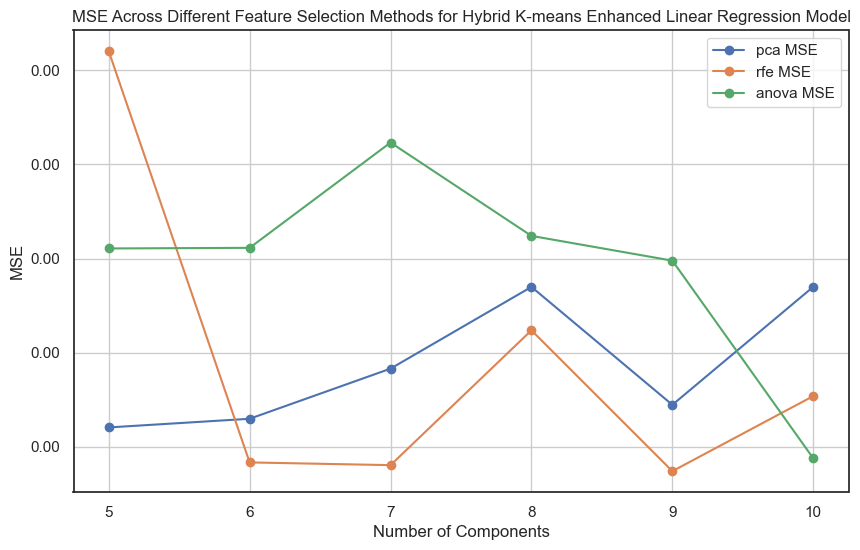

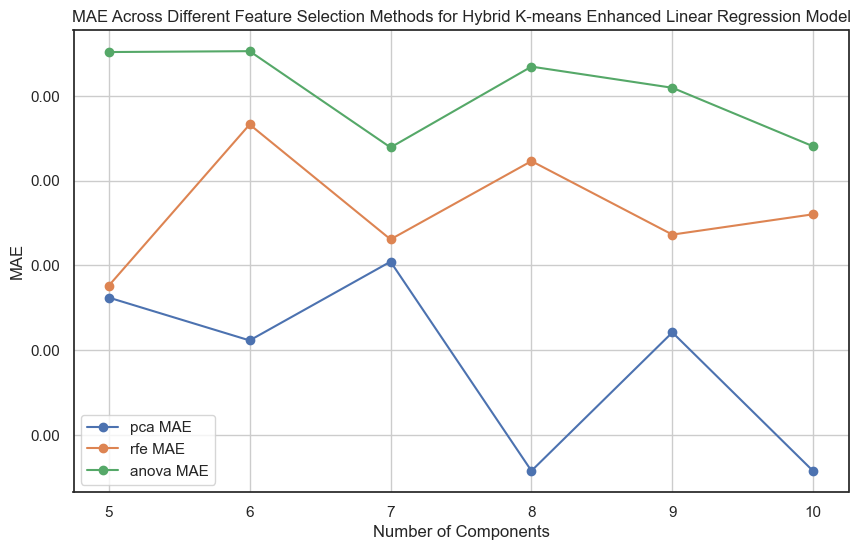

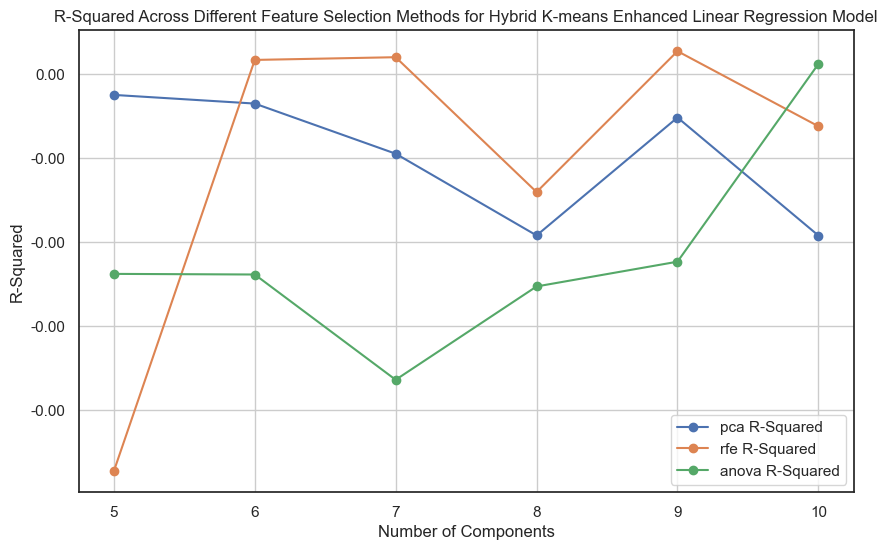

In [77]:
import matplotlib.pyplot as plt

components = range(5, 11)

# Create line plots for MSE, MAE, and R-Squared for KMeans
for metric, scores in zip(['MSE', 'MAE', 'R-Squared'], [kmeans_mse_scores, kmeans_mae_scores, kmeans_r2_scores]):
    plt.figure(figsize=(10, 6))
    for df_name in dataframes:
        plt.plot(components, scores[df_name], marker='o', label=f'{df_name} {metric}')
    
    plt.xlabel('Number of Components')
    plt.ylabel(metric)
    plt.title(f'{metric} Across Different Feature Selection Methods for Hybrid K-means Enhanced Linear Regression Model')
    plt.legend()
    plt.grid(True)
    
    # Format the y-axis labels
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2f}'))
    
    plt.show()


### Line Plots for MSE, MAE, and R-Squared for Hybrid Gaussian Mixture Enhanced Linear Regression Model

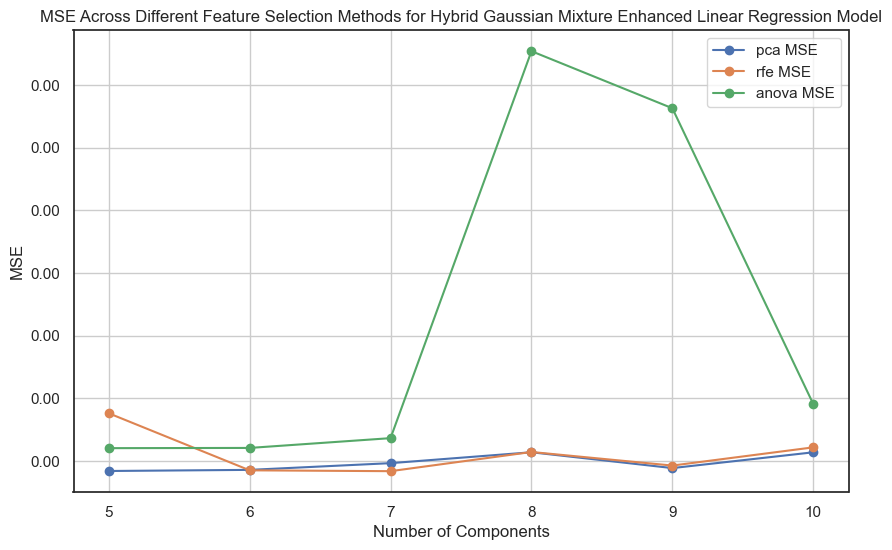

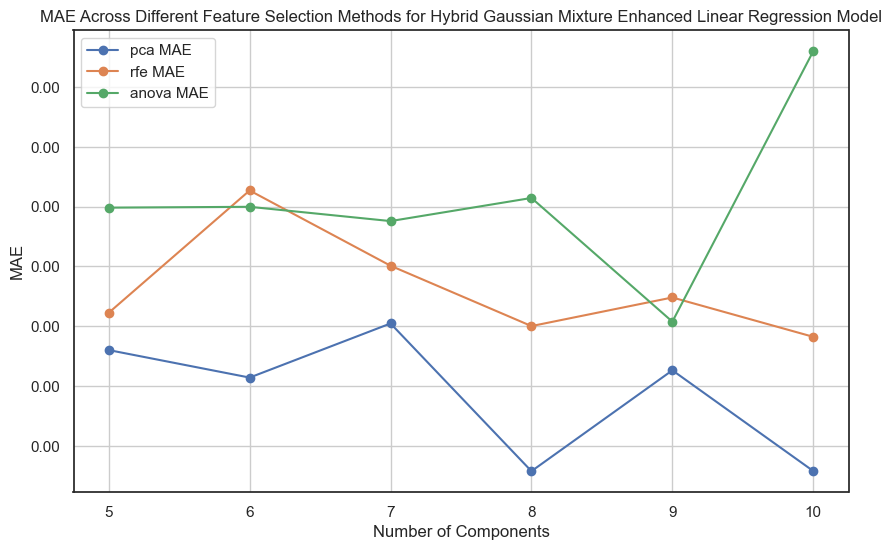

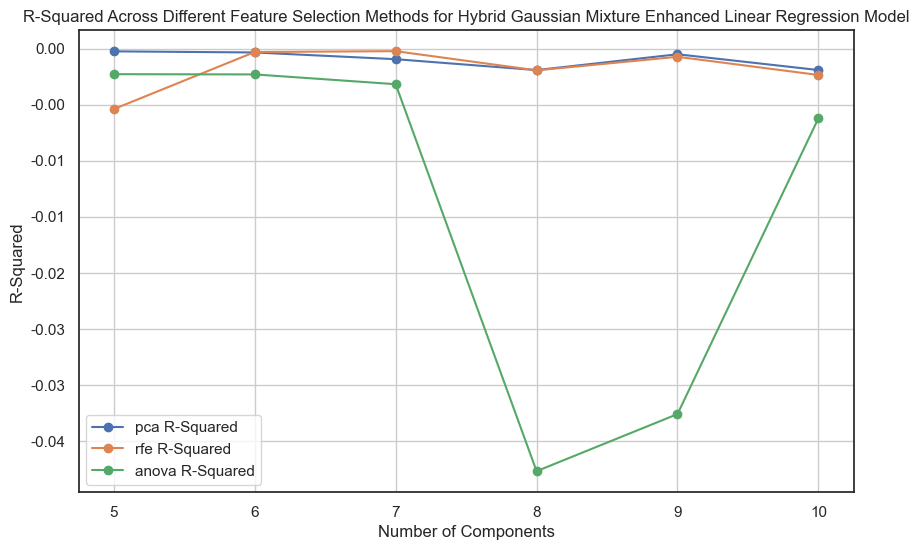

In [78]:
components = range(5, 11)

# Create line plots for MSE, MAE, and R-Squared for GMM
for metric, scores in zip(['MSE', 'MAE', 'R-Squared'], [gmm_mse_scores, gmm_mae_scores, gmm_r2_scores]):
    plt.figure(figsize=(10, 6))
    for df_name in dataframes:
        plt.plot(components, scores[df_name], marker='o', label=f'{df_name} {metric}')
    
    plt.xlabel('Number of Components')
    plt.ylabel(metric)
    plt.title(f'{metric} Across Different Feature Selection Methods for Hybrid Gaussian Mixture Enhanced Linear Regression Model')
    plt.legend()
    plt.grid(True)
    
    # Format the y-axis labels
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2f}'))
    
    plt.show()


### Line Plots for MSE, MAE, and R-Squared for Neural Network Model

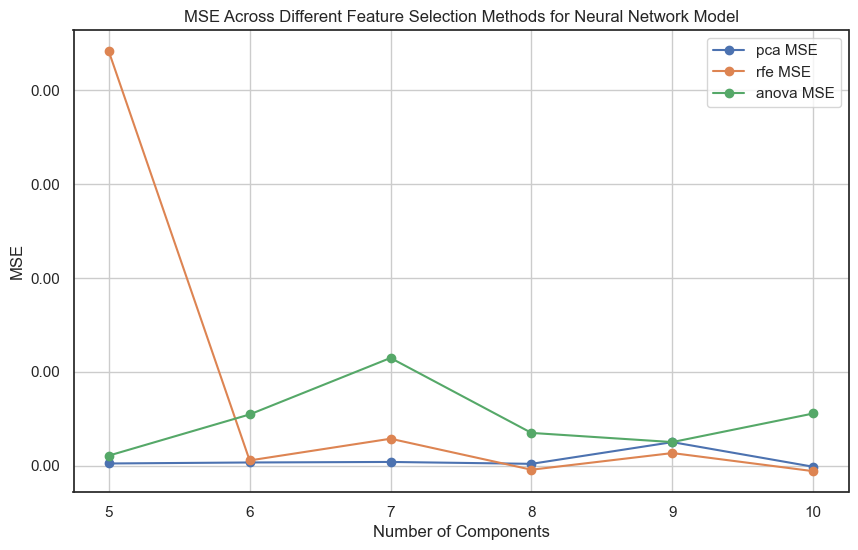

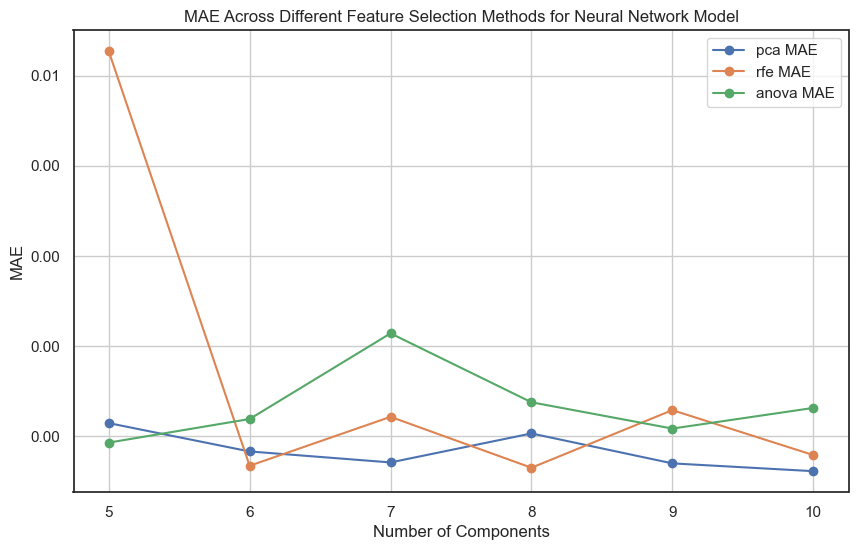

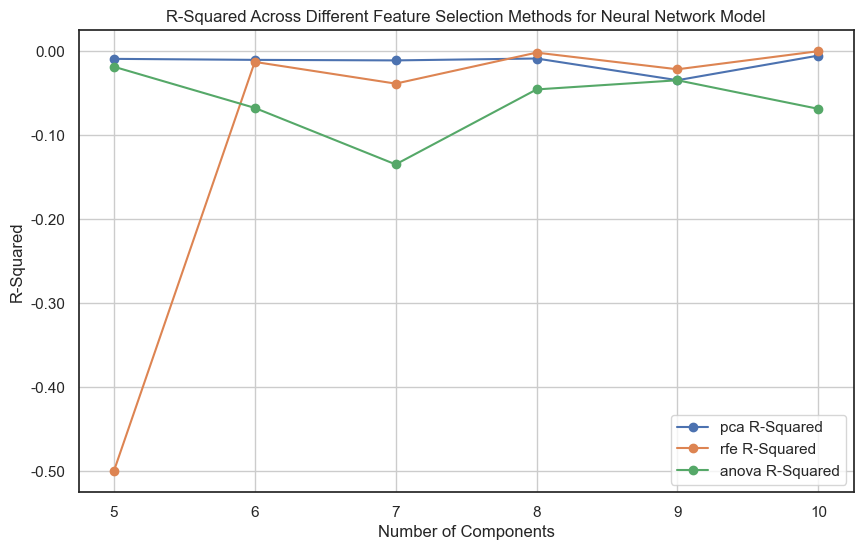

In [79]:
components = range(5, 11)

# Create line plots for MSE, MAE, and R-Squared for Neural Network
for metric, scores in zip(['MSE', 'MAE', 'R-Squared'], [nn_mse_scores, nn_mae_scores, nn_r2_scores]):
    plt.figure(figsize=(10, 6))
    for df_name in dataframes:
        plt.plot(components, scores[df_name], marker='o', label=f'{df_name} {metric}')
    
    plt.xlabel('Number of Components')
    plt.ylabel(metric)
    plt.title(f'{metric} Across Different Feature Selection Methods for Neural Network Model')
    plt.legend()
    plt.grid(True)
    
    # Format the y-axis labels
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2f}'))
    
    plt.show()


### Line Plots for MSE, MAE, and R-Squared for Support Vector Regression Model

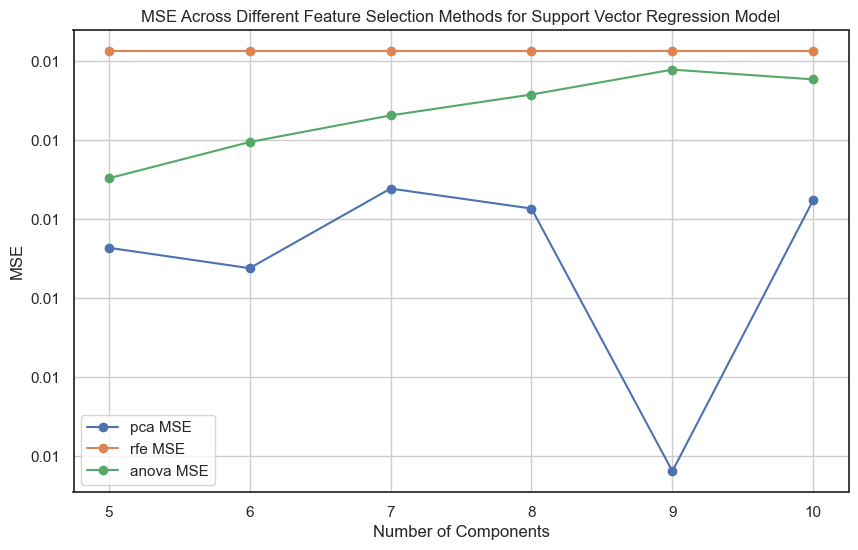

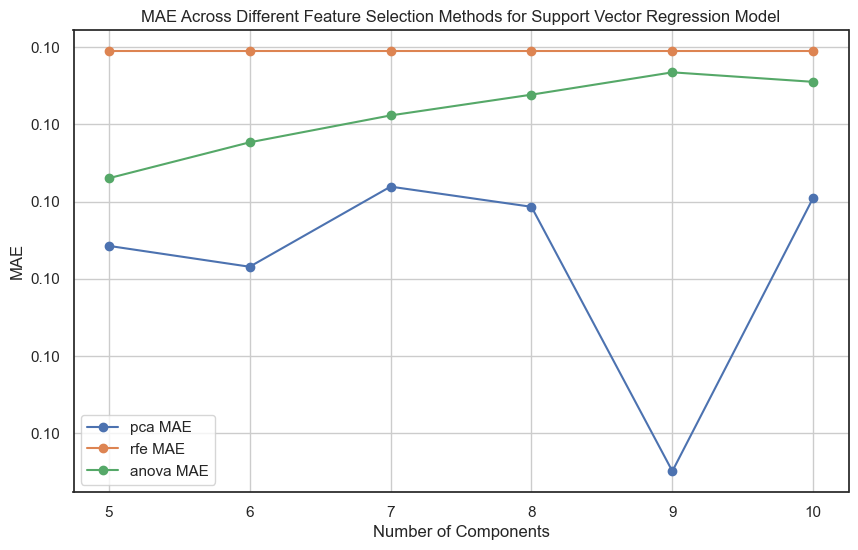

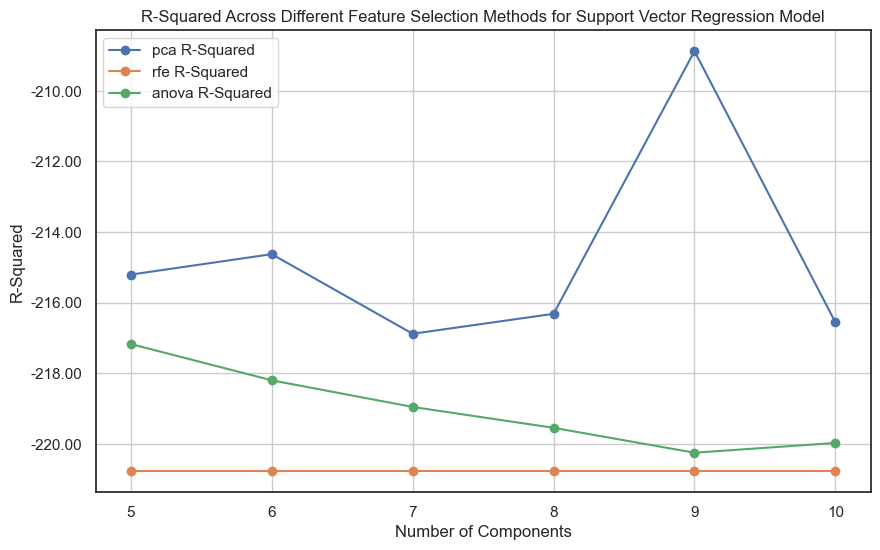

In [80]:
# Assuming you have stored svr_mse_scores, svr_mae_scores, svr_r2_scores for the SVR model

components = range(5, 11)

# Create line plots for MSE, MAE, and R-Squared for SVR
for metric, scores in zip(['MSE', 'MAE', 'R-Squared'], [svr_mse_scores, svr_mae_scores, svr_r2_scores]):
    plt.figure(figsize=(10, 6))
    for df_name in dataframes:
        plt.plot(components, scores[df_name], marker='o', label=f'{df_name} {metric}')
    
    plt.xlabel('Number of Components')
    plt.ylabel(metric)
    plt.title(f'{metric} Across Different Feature Selection Methods for Support Vector Regression Model')
    plt.legend()
    plt.grid(True)
    
    # Format the y-axis labels
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2f}'))
    
    plt.show()



## Results Analysis
-------------------------------------------------------------

In [81]:
# Dictionaries to store the best metrics for each model
best_models = {
    'Hybrid K-means Enhanced Linear Regression Model': {'mse': np.inf, 'components': 0, 'method': '', 'mae': None, 'r2': None},
    'Hybrid Gaussian Mixture Enhanced Linear Regression Model': {'mse': np.inf, 'components': 0, 'method': '', 'mae': None, 'r2': None},
    'Neural Network Model': {'mse': np.inf, 'components': 0, 'method': '', 'mae': None, 'r2': None},
    'Support Vector Regression Model': {'mse': np.inf, 'components': 0, 'method': '', 'mae': None, 'r2': None}
}


# Assuming the best_overall_mse, best_overall_method, best_overall_components, best_overall_mae, best_overall_r2 are the final best results from each model code
best_models['Hybrid K-means Enhanced Linear Regression Model']['mse'] = best_overall_mse_kmeans
best_models['Hybrid K-means Enhanced Linear Regression Model']['components'] = best_overall_components_kmeans
best_models['Hybrid K-means Enhanced Linear Regression Model']['method'] = best_overall_method_kmeans
best_models['Hybrid K-means Enhanced Linear Regression Model']['mae'] = best_overall_mae_kmeans
best_models['Hybrid K-means Enhanced Linear Regression Model']['r2'] = best_overall_r2_kmeans

best_models['Hybrid Gaussian Mixture Enhanced Linear Regression Model']['mse'] = best_overall_mse_gmm
best_models['Hybrid Gaussian Mixture Enhanced Linear Regression Model']['components'] = best_overall_components_gmm
best_models['Hybrid Gaussian Mixture Enhanced Linear Regression Model']['method'] = best_overall_method_gmm
best_models['Hybrid Gaussian Mixture Enhanced Linear Regression Model']['mae'] = best_overall_mae_gmm
best_models['Hybrid Gaussian Mixture Enhanced Linear Regression Model']['r2'] = best_overall_r2_gmm

best_models['Neural Network Model']['mse'] = best_overall_mse_nn
best_models['Neural Network Model']['components'] = best_overall_components_nn
best_models['Neural Network Model']['method'] = best_overall_method_nn
best_models['Neural Network Model']['mae'] = best_overall_mae_nn
best_models['Neural Network Model']['r2'] = best_overall_r2_nn

best_models['Support Vector Regression Model']['mse'] = best_overall_mse_svr
best_models['Support Vector Regression Model']['components'] = best_overall_components_svr
best_models['Support Vector Regression Model']['method'] = best_overall_method_svr
best_models['Support Vector Regression Model']['mae'] = best_overall_mae_svr
best_models['Support Vector Regression Model']['r2'] = best_overall_r2_svr

# Rank models from best to last based on MSE
ranked_models = sorted(best_models.items(), key=lambda item: item[1]['mse'])

# Print the ranked models with formatted values
print("Ranking of models from best to last based on MSE:")
for rank, (model_name, metrics) in enumerate(ranked_models, 1):
    print(f"{rank}. {model_name}")
    print(f"   Method: {metrics['method']}")
    print(f"   Components: {metrics['components']}")
    print(f"   MSE: {metrics['mse']:.8f}")
    print(f"   MAE: {metrics['mae']:.8f}")
    print(f"   R-squared: {metrics['r2']:.8f}")


Ranking of models from best to last based on MSE:
1. Hybrid K-means Enhanced Linear Regression Model
   Method: rfe
   Components: 9
   MSE: 0.00004469
   MAE: 0.00076363
   R-squared: 0.00027088
2. Hybrid Gaussian Mixture Enhanced Linear Regression Model
   Method: rfe
   Components: 7
   MSE: 0.00004471
   MAE: 0.00077013
   R-squared: -0.00023408
3. Neural Network Model
   Method: rfe
   Components: 10
   MSE: 0.00004471
   MAE: 0.00078653
   R-squared: -0.00027728
4. Support Vector Regression Model
   Method: pca
   Components: 9
   MSE: 0.00938139
   MAE: 0.09675203
   R-squared: -208.87860361


# Reflection

The Hybrid K-means Enhanced Linear Regression Model with RFE and 9 components achieved the lowest MSE (0.00004469) and MAE (0.00076360), ranking first. The Hybrid Gaussian Mixture Enhanced Linear Regression Model with RFE and 7 components followed closely with an MSE of 0.00004471 and MAE of 0.00077013 but showed overfitting (-0.00023408 R-squared). The Neural Network Model with RFE and 6 components had a slightly higher MSE (0.00004477) but better MAE (0.00062504), though it also overfit (-0.00161439 R-squared), ranking third. The Support Vector Regression Model with PCA and 9 components had the highest MSE (0.00938139) and MAE (0.09675203), and significant overfitting (-208.87860361 R-squared), ranking fourth. These results emphasize the importance of selecting the right model and feature selection method, with KMeans and GMM performing best, while Neural Networks and SVR require further tuning.

**Significance of the Prediction Models:**

1. Property Owners and Investors: Make informed decisions regarding property pricing, investment opportunities, and market trends.

2. Tenants: Potential tenants can use the predictions to find rental properties that fit their budget and preferences, leading to better housing choices.

3. Market Analysis: The models provide valuable insights into market dynamics, helping industry professionals understand the key drivers of rental prices and adapt their strategies accordingly

**Limitaitons of Prediction Model:**

1. Unexpected Events:The models may not account for unexpected events such as natural disasters, pandemics, or sudden economic downturns, which can drastically impact rental prices.

2. Dynamic Market Conditions: Models trained on historical data may not always adapt to future market conditions, especially in a highly dynamic and fluctuating real estate market. Rapid changes in the economy or housing policies can render predictions less accurate.

**Future Work and Recommendations:**

1. Advanced Modeling Techniques: Explore advanced machine learning techniques like ensemble methods (e.g., Random Forest, Gradient Boosting) and deep learning models to capture complex patterns in the data.

2. Model Validation: Implement robust cross-validation techniques to ensure models generalize well to unseen data and prevent overfitting.

3. Beyond Kuala Lumpur and Selangor: Expand the study to include other regions in Malaysia. By exploring rental prices in different cities and states, the models can be made more versatile and applicable to a broader market.